In [2]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/asana-helpdocs/annotated_asana_articles.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,Link,Heading,Content,start_position,end_position
0,https://help.asana.com/hc/en-us/articles/14250...,How Asana works,Whether you are working on a simple task or a ...,0,284
1,https://help.asana.com/hc/en-us/articles/14250...,What is Asana?,Asana is a comprehensive work management tool ...,0,327
2,https://help.asana.com/hc/en-us/articles/14250...,What can you do in Asana?,Whether you're an individual contributor seeki...,0,191
3,https://help.asana.com/hc/en-us/articles/14250...,Coordination and collaboration,Asana allows you to collaborate with teammates...,0,660
4,https://help.asana.com/hc/en-us/articles/14250...,Personal productivity,Asana helps you manage individual work and boo...,0,556


In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Link            79 non-null     object
 1   Heading         79 non-null     object
 2   Content         79 non-null     object
 3   start_position  79 non-null     int64 
 4   end_position    79 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.2+ KB


In [4]:
# Summary statistics for numeric columns
df.describe()

,start_position,end_position
count,79.0,79.000000
mean,0.0,421.063291
std,0.0,214.422800
min,0.0,34.000000
25%,0.0,284.000000
50%,0.0,361.000000
75%,0.0,557.500000
max,0.0,982.000000


In [5]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

Link              0
Heading           0
Content           0
start_position    0
end_position      0
dtype: int64

In [6]:
df_qa = pd.read_csv("/kaggle/input/asana-qa/asana_qa_dataset.csv")

df_qa.head()

In [7]:
# Analyze the length of questions and answers
df_qa['question_length'] = df_qa['Question'].apply(len)
df_qa['answer_length'] = df_qa['Answer'].apply(len)

# Word frequency analysis for questions
from collections import Counter
import re

def word_frequency(text):
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

question_word_freq = df_qa['Question'].apply(word_frequency).sum()
answer_word_freq = df_qa['Answer'].apply(word_frequency).sum()

# Display most common words in questions and answers
print(question_word_freq.most_common(10))
print(answer_word_freq.most_common(10))

[('asana', 122680), ('in', 84511), ('what', 39999), ('how', 39992), ('you', 39984), ('with', 33626), ('to', 29100), ('for', 29078), ('on', 24536), ('tasks', 22719)]
[('the', 299797), ('asana', 222526), ('to', 208823), ('in', 204357), ('project', 118158), ('by', 99957), ('or', 99870), ('from', 99852), ('workspace', 99851), ('relevant', 99849)]


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


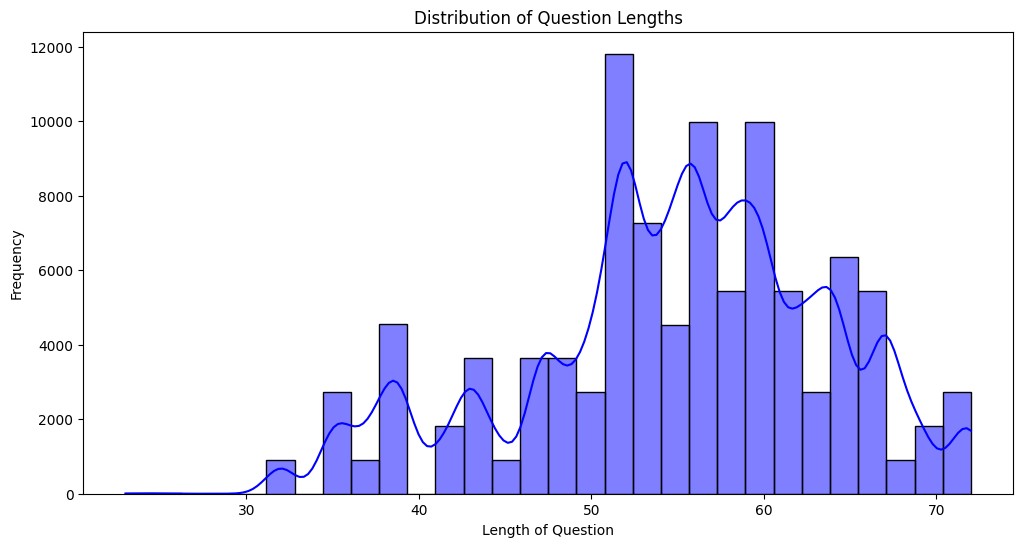

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of question and answer lengths
plt.figure(figsize=(12, 6))
sns.histplot(df_qa['question_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Question Lengths')
plt.xlabel('Length of Question')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


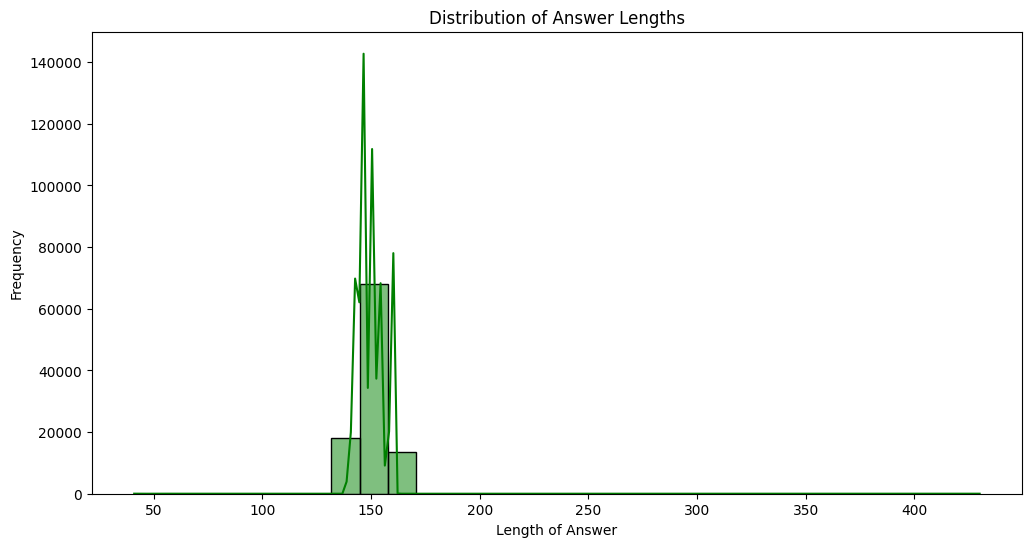

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(df_qa['answer_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Answer Lengths')
plt.xlabel('Length of Answer')
plt.ylabel('Frequency')
plt.show()

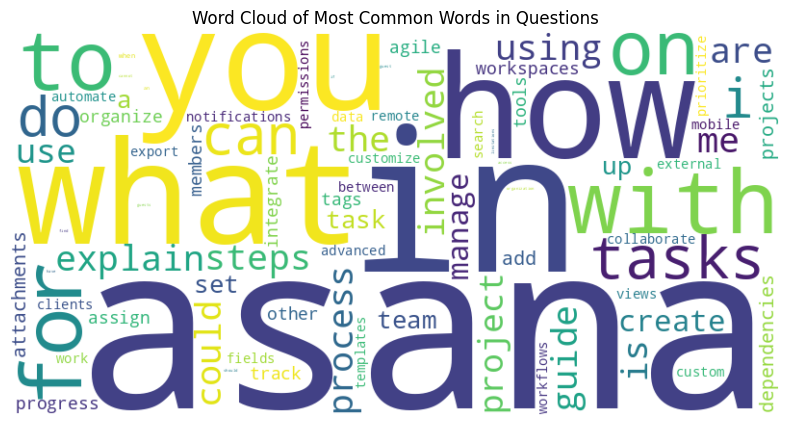

In [12]:
# Word cloud for most common words in questions
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(question_word_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words in Questions')
plt.show()

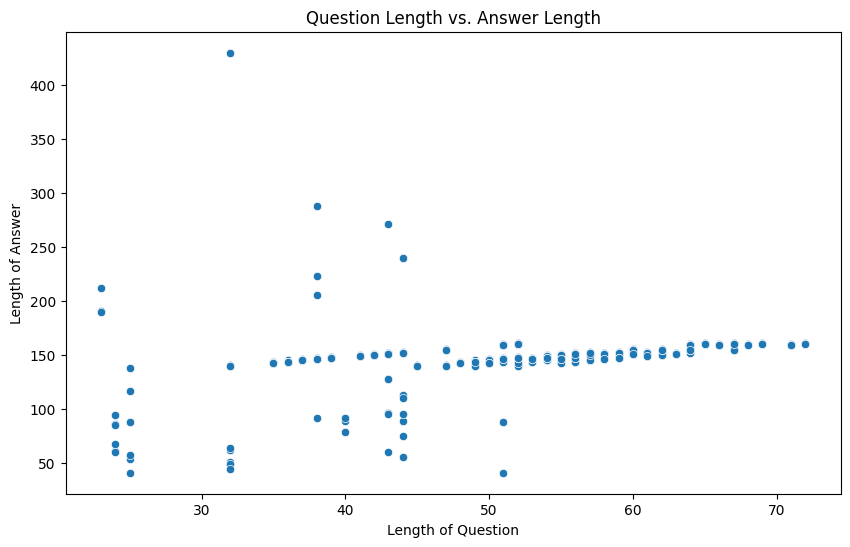

In [14]:
# Scatter plot of question length vs. answer length
plt.figure(figsize=(10, 6))
sns.scatterplot(x='question_length', y='answer_length', data=df_qa)
plt.title('Question Length vs. Answer Length')
plt.xlabel('Length of Question')
plt.ylabel('Length of Answer')
plt.show()

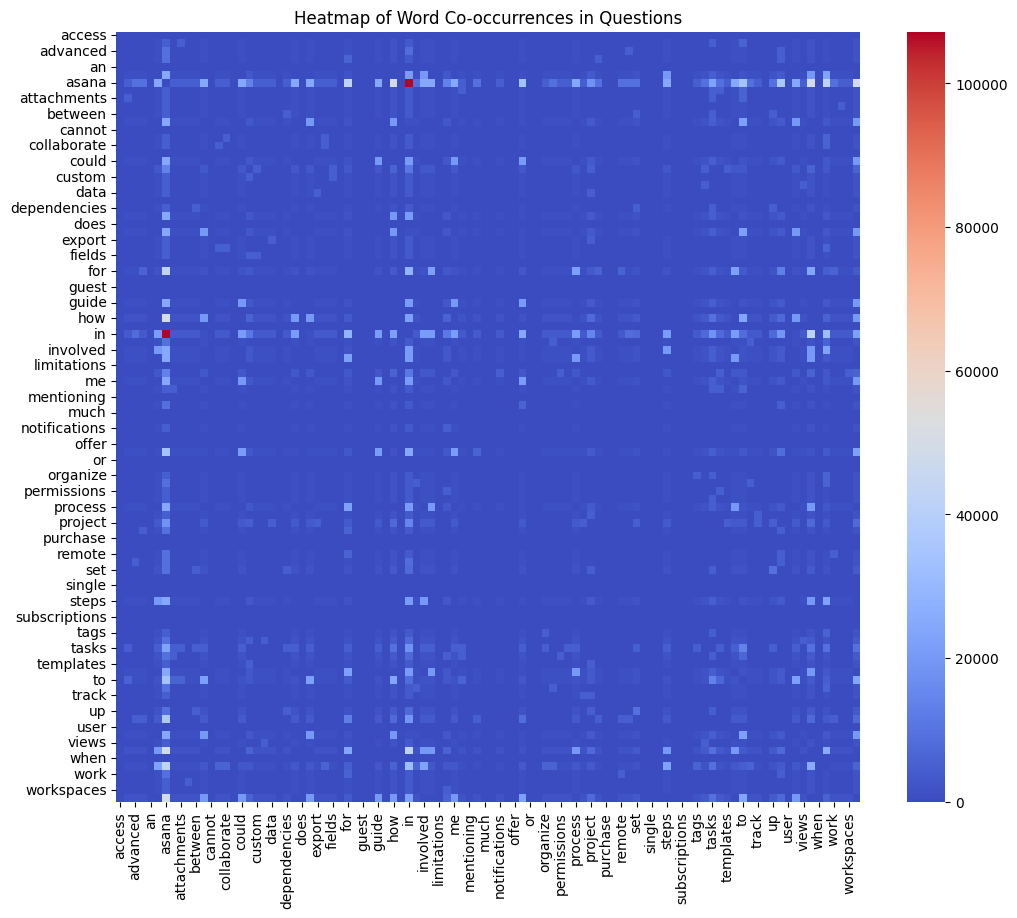

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Create a document-term matrix for questions
vectorizer = CountVectorizer(max_features=100)  # Limit to top 100 words for simplicity
X = vectorizer.fit_transform(df_qa['Question'])

# Calculate co-occurrence matrix
cooccurrence_matrix = (X.T * X)  # This is the matrix multiplication of X transpose and X
cooccurrence_matrix.setdiag(0)  # Set the diagonal to zero

# Convert to a dataframe for better readability
words = vectorizer.get_feature_names_out()
cooccurrence_df = pd.DataFrame(data=cooccurrence_matrix.toarray(), index=words, columns=words)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence_df, cmap='coolwarm')
plt.title('Heatmap of Word Co-occurrences in Questions')
plt.show()

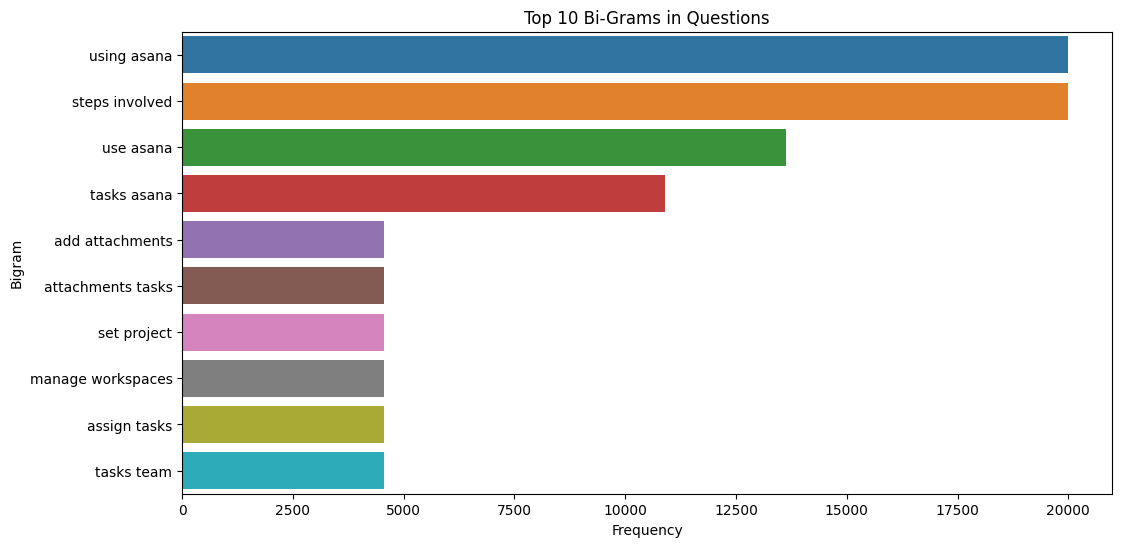

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to extract top N n-grams
def get_top_ngrams(corpus, ngram_range=(2, 2), n=None):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top bi-grams (2-word sequences) in questions
top_bigrams = get_top_ngrams(df_qa['Question'], ngram_range=(2, 2), n=10)

# Plot the top bi-grams
bigrams_df = pd.DataFrame(top_bigrams, columns=['Bigram', 'Frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Bigram', data=bigrams_df)
plt.title('Top 10 Bi-Grams in Questions')
plt.show()